Going to do the same as salmon_lin notebook,
but it seems like the linear fit is poor, so lets try quadratic:

In [17]:
import os
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

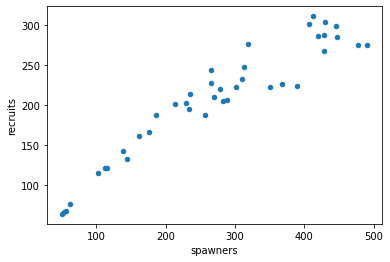

In [18]:
data = pd.read_table('../data/salmon.txt', sep='\s+')
data.plot.scatter(x='spawners', y='recruits');

Simple quadratic regression:

$$ y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i $$

$$ \epsilon_i \sim N(0, \sigma) $$

There are four unknowns, each of which need to be given a prior:

$$\beta_0, \beta_1, \beta_2 \sim \text{Normal}(0, 50)$$

$$\sigma \sim \text{HalfNormal}(50)$$

In [19]:
x, y = data[['spawners', 'recruits']].values.T


In [20]:
with pm.Model() as quad_salmon_model:
    beta = pm.Normal('β', mu=0, sigma=50, shape=3)
    sigma = pm.HalfNormal('σ', sigma=50)
    mu = beta[0] + (beta[1] * x) + (beta[2] * x * x)
    recruits = pm.Normal('recruits', mu=mu, sigma=sigma, observed=y)

In [21]:
with quad_salmon_model:
    quad_trace = pm.sample(1000, tune=2000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, β]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 33 seconds.
The acceptance probability does not match the target. It is 0.90312971521191, but should be close to 0.8. Try to increase the number of tuning steps.
There were 45 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6944885403543988, but should be close to 0.8. Try to increase the number of tuning steps.
There were 103 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5969434783961552, but should be close to 0.8. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


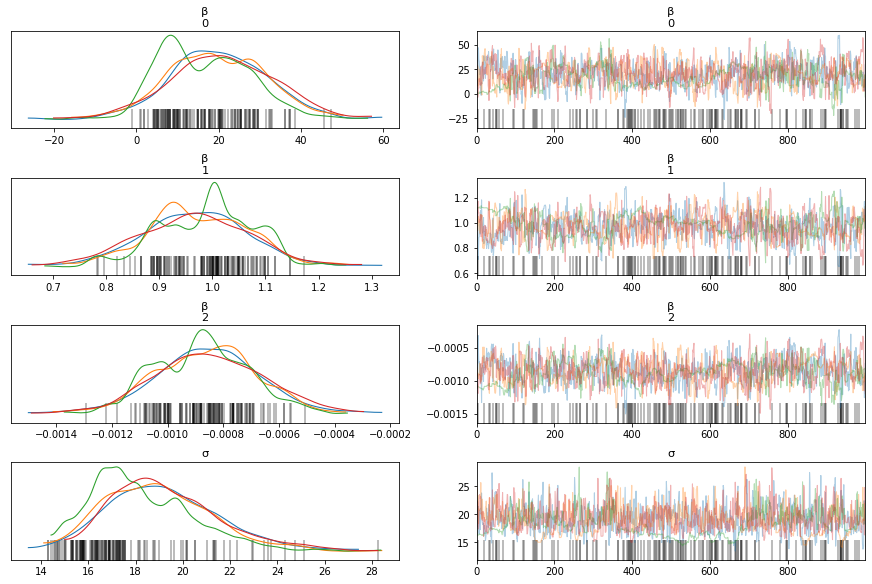

In [22]:
az.plot_trace(quad_trace);